In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [37]:
train = pd.read_csv('input/train.csv')
print(train.head())
print()
print(train.info())

c:\python3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   id  label               province               district  age_source1  \
0   0      0                    NaN                    NaN          NaN   
1   1      0          Tỉnh Đồng Nai     Thành phố Biên Hòa         44.0   
2   2      0          Tỉnh Đồng Nai       Huyện Long Thành         30.0   
3   3      0       Tỉnh Tuyên Quang  Thành phố Tuyên Quang         43.0   
4   4      0  Thành phố Hồ Chí Minh                 Quận 1         21.0   

   age_source2       maCv  FIELD_1  FIELD_2  FIELD_3  ...  FIELD_48  FIELD_49  \
0          NaN        NaN        1      1.0   2547.0  ...      True      True   
1         44.0       None        1      0.0     -1.0  ...     False      True   
2         30.0  Công nhân        0      1.0   3273.0  ...      True      True   
3          NaN        NaN        0      1.0   3991.0  ...      True     False   
4         21.0       None        0      1.0   1450.0  ...      True      True   

   FIELD_50 FIELD_51 FIELD_52 FIELD_53 FIELD_54 FIELD_55 FIELD

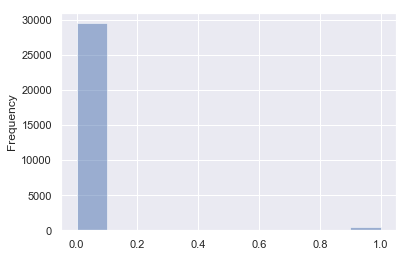

In [3]:
target = train.label
# train.drop(columns=['label'])
target.plot.hist(alpha=0.5)

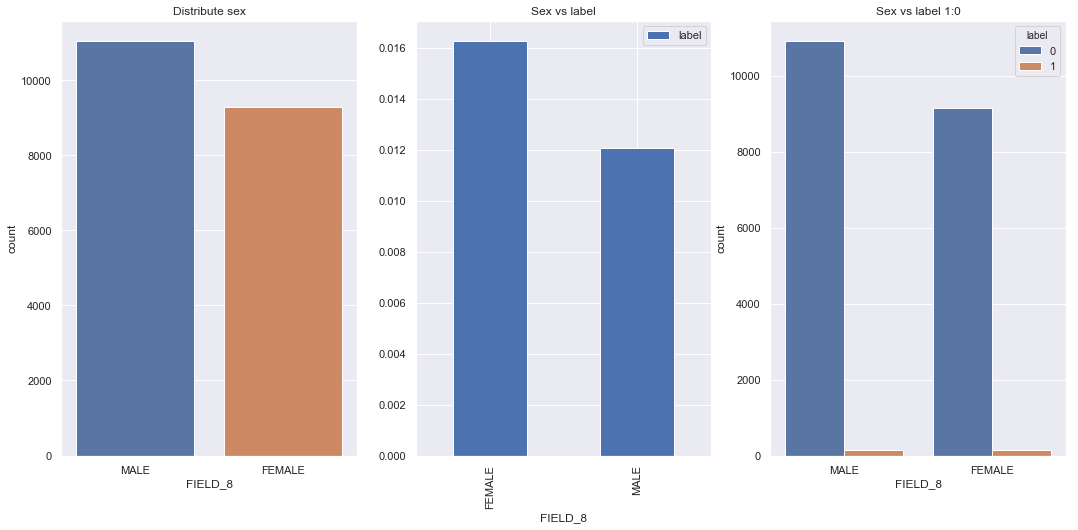

In [4]:
# Sex
sex = train.FIELD_8
train.groupby(['FIELD_8', 'label'])['label'].count()
f, ax = plt.subplots(1,3,figsize=(18,8))

sns.countplot(x="FIELD_8", data=train, ax=ax[0])
ax[0].set_title('Distribute sex')

train[['FIELD_8','label']].groupby(['FIELD_8']).mean().plot.bar(ax=ax[1])
ax[1].set_title('Sex vs label')

ax[2] = sns.countplot('FIELD_8', hue='label', data=train, ax=ax[2])
ax[2].set_title('Sex vs label 1:0')
plt.show()

Oldest source 1: 71.0	Oldest source 2: 89.0
Youngest source 1: 0.0	Youngest source 2: -1.0
Average source 1: 33.041014602361976	Average source 2: 32.87201062887511


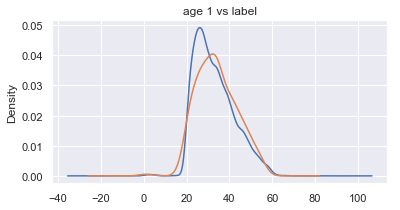

Text(0.5,1,'age 2 vs label')

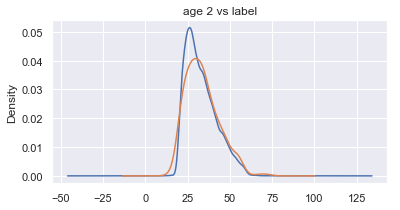

In [5]:
# age
print('Oldest source 1: ' + str(train.age_source1.max())+ '\tOldest source 2: ' + str(train.age_source2.max()))
print('Youngest source 1: ' + str(train.age_source1.min())+'\tYoungest source 2: ' + str(train.age_source2.min()))
print('Average source 1: ' + str(train.age_source1.mean())+ '\tAverage source 2: ' + str(train.age_source2.mean()))

f, ax = plt.subplots(1,1, figsize=(6,3))
ax = train[train['label'] == 0].age_source1.plot.kde()
ax = train[train['label'] == 1].age_source1.plot.kde()
ax.set_title('age 1 vs label')
plt.show()
f, ax = plt.subplots(1,1, figsize=(6,3))
ax = train[train['label'] == 0].age_source2.plot.kde()
ax = train[train['label'] == 1].age_source2.plot.kde()
ax.set_title('age 2 vs label')

In [6]:
# province
from pyvi import ViTokenizer as tokenizer
def tokenize(s):
    return tokenizer.tokenize(str(s)).lower()
train['token_province'] = train['province'].apply(lambda x: tokenize(x))


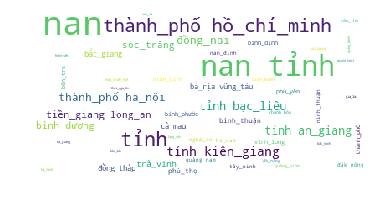

In [7]:
from wordcloud import WordCloud
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(list(train[train.label == 1]['token_province'].values)))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

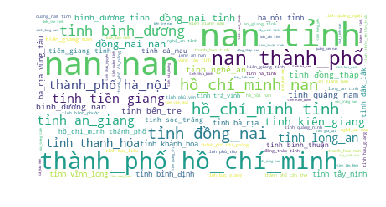

In [8]:
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(list(train[train.label == 0]['token_province'].values)))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

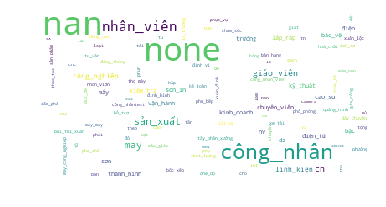

In [9]:
# maCV
train['token_maCv'] = train['maCv'].apply(lambda x: tokenize(x))
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(list(train[train.label == 1]['token_maCv'].values)))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

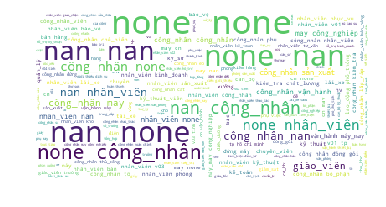

In [10]:
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(list(train[train.label == 0]['token_maCv'].values)))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [11]:
float_cols = [col for col in train.columns if (col.startswith('FIELD') and str(train[col].dtypes) == 'float64')]
print()
float_cols

['FIELD_2',
 'FIELD_3',
 'FIELD_4',
 'FIELD_5',
 'FIELD_6',
 'FIELD_16',
 'FIELD_21',
 'FIELD_22',
 'FIELD_50',
 'FIELD_51',
 'FIELD_52',
 'FIELD_53',
 'FIELD_54',
 'FIELD_55',
 'FIELD_56',
 'FIELD_57']

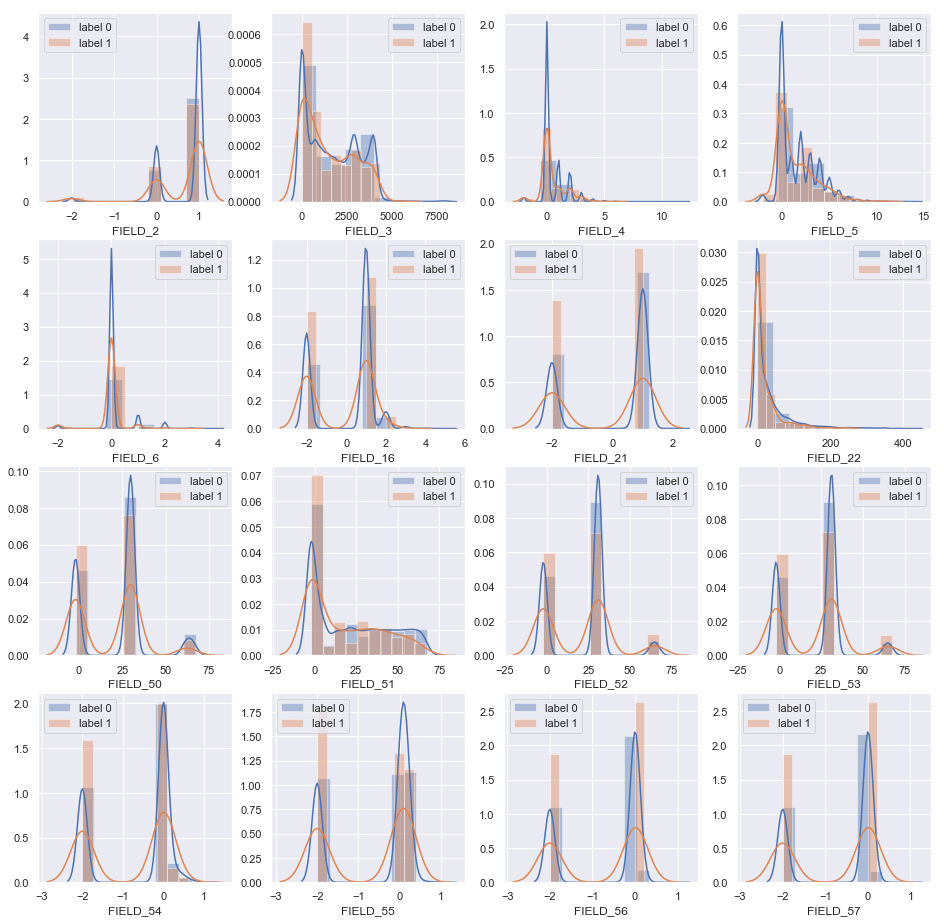

In [12]:
def subplot_float(df, cols, ax):
#     ax.hist(df[df.label==0][cols].dropna(), bins=10, label=float_cols[0+i*4] + '- label 0')
#     ax.hist(df[df.label==1][cols].dropna(), bins=10, label=float_cols[0+i*4] + '- label 1')
#     ax.hist(df[cols].dropna(), bins=10, label=cols)
#     ax.legend()
    sns.distplot(df[df['label'] == 0][cols].fillna(-2.0), ax=ax, bins=10, label='label 0')
    sns.distplot( df[df['label'] == 1][cols].fillna(-2.0), ax=ax, bins=10, label='label 1')
    ax.legend()
axs = (None, None, None, None)
fig, axsz = plt.subplots(4,4, figsize=(16, 16))
for i, axs in enumerate(axsz):
    (ax0, ax1, ax2, ax3) = axs
    subplot_float(train, float_cols[0+i*4], ax0)
    subplot_float(train, float_cols[1+i*4], ax1)
    subplot_float(train, float_cols[2+i*4], ax2)
    subplot_float(train, float_cols[3+i*4], ax3)
plt.show()

In [13]:
import seaborn as sns

In [14]:
# sns.distplot(train['FIELD_51'].fillna(-1))

In [15]:
bool_cols = [col for col in train.columns if (col.startswith('FIELD') and str(train[col].dtypes) == 'bool')]
print()
bool_cols

['FIELD_47', 'FIELD_48', 'FIELD_49']

In [16]:
int_cols = [col for col in train.columns if (col.startswith('FIELD') and str(train[col].dtypes) == 'int64')]
print()


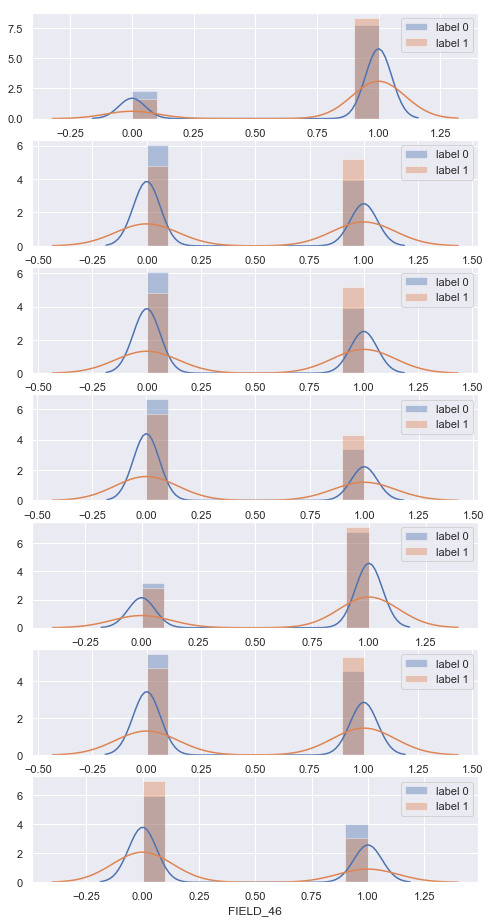

In [17]:
def subplot_float(df, cols, ax):
#     ax.hist(df[df.label==0][cols].dropna(), bins=10, label=float_cols[0+i*4] + '- label 0')
#     ax.hist(df[df.label==1][cols].dropna(), bins=10, label=float_cols[0+i*4] + '- label 1')
#     ax.hist(df[cols].dropna(), bins=10, label=cols)
#     ax.legend()
    sns.distplot(df[df['label'] == 0][cols].fillna(-2.0), ax=ax, bins=10, label='label 0')
    sns.distplot( df[df['label'] == 1][cols].fillna(-2.0), ax=ax, bins=10, label='label 1')
    ax.legend()
axs = (None, None, None, None)
fig, axsz = plt.subplots(7,1, figsize=(8, 16))
for i, axs in enumerate(axsz):
    subplot_float(train, int_cols[i], axs)
plt.show()

In [18]:
# FEATURE ENGINEERING


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import preprocessing

In [20]:
train_cols = [col for col in train.columns if col not in ['province', 'district', 'maCv', 'label', 'FIELD_7', 'token_province', 'token_maCv']]
# train_cols = [col for col in train.columns if col not in ['label']]

In [21]:
category_cols = [col for col in train_cols if str(train[col].dtypes) == 'object']
print(category_cols)
print()
print(train[category_cols].head())

['FIELD_8', 'FIELD_9', 'FIELD_10', 'FIELD_11', 'FIELD_12', 'FIELD_13', 'FIELD_17', 'FIELD_18', 'FIELD_19', 'FIELD_20', 'FIELD_23', 'FIELD_24', 'FIELD_25', 'FIELD_26', 'FIELD_27', 'FIELD_28', 'FIELD_29', 'FIELD_30', 'FIELD_31', 'FIELD_35', 'FIELD_36', 'FIELD_37', 'FIELD_38', 'FIELD_39', 'FIELD_40', 'FIELD_41', 'FIELD_42', 'FIELD_43', 'FIELD_44', 'FIELD_45']

  FIELD_8 FIELD_9 FIELD_10 FIELD_11 FIELD_12 FIELD_13 FIELD_17 FIELD_18  \
0     NaN      na      NaN      NaN      NaN      NaN      NaN      NaN   
1    MALE      GD       T1       12     None       BI       G8     True   
2  FEMALE      DN       T1       12        0       YN     None    False   
3     NaN      na      NaN      NaN      NaN      NaN      NaN      NaN   
4    MALE      GD       T1       12     None       BI       G8     True   

  FIELD_19 FIELD_20  ... FIELD_36 FIELD_37 FIELD_38 FIELD_39 FIELD_40  \
0      NaN      NaN  ...      NaN      NaN      NaN      NaN      NaN   
1     True     True  ...    FALSE     True 

In [22]:
# one hot encoding
for col in category_cols:
    train[col] = train[col].fillna('NaN')
    one_hot = pd.get_dummies(train[col], prefix=col)
    # Drop column B as it is now encoded
    train = train.drop(col,axis = 1)
    # Join the encoded df
    train = train.join(one_hot)
#     le = preprocessing.LabelEncoder()
#     le.fit(train[col].astype(str))
#     train[col] = le.transform(train[col].astype(str))
print(train.columns)
print()
print(train.head())

Index(['id', 'label', 'province', 'district', 'age_source1', 'age_source2',
       'maCv', 'FIELD_1', 'FIELD_2', 'FIELD_3',
       ...
       'FIELD_44_NaN', 'FIELD_44_None', 'FIELD_44_One', 'FIELD_44_Two',
       'FIELD_45_1.0', 'FIELD_45_2.0', 'FIELD_45_1', 'FIELD_45_2',
       'FIELD_45_NaN', 'FIELD_45_None'],
      dtype='object', length=509)

   id  label               province               district  age_source1  \
0   0      0                    NaN                    NaN          NaN   
1   1      0          Tỉnh Đồng Nai     Thành phố Biên Hòa         44.0   
2   2      0          Tỉnh Đồng Nai       Huyện Long Thành         30.0   
3   3      0       Tỉnh Tuyên Quang  Thành phố Tuyên Quang         43.0   
4   4      0  Thành phố Hồ Chí Minh                 Quận 1         21.0   

   age_source2       maCv  FIELD_1  FIELD_2  FIELD_3  ...  FIELD_44_NaN  \
0          NaN        NaN        1      1.0   2547.0  ...             1   
1         44.0       None        1      0.0     -

In [23]:
print(train.columns)
train_cols = [col for col in train.columns if col not in ['province', 'district', 'maCv', 'label', 'FIELD_7', 'token_province', 'token_maCv']]
# train_cols = [col for col in train.columns if col not in ['label']]

Index(['id', 'label', 'province', 'district', 'age_source1', 'age_source2',
       'maCv', 'FIELD_1', 'FIELD_2', 'FIELD_3',
       ...
       'FIELD_44_NaN', 'FIELD_44_None', 'FIELD_44_One', 'FIELD_44_Two',
       'FIELD_45_1.0', 'FIELD_45_2.0', 'FIELD_45_1', 'FIELD_45_2',
       'FIELD_45_NaN', 'FIELD_45_None'],
      dtype='object', length=509)


In [24]:
train_y = train.label
train.drop(columns=['label'])
train_X = train[train_cols]

In [25]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y,test_size=0.4, random_state=0)

In [26]:
# training model
params={
    'seed': 0,
    'colsample_bytree': 0.7,
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.075,
    'objective': 'binary:logistic',
    'max_depth': 4,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'nrounds': 200
    }

clf = XGBClassifier(**params)
clf.fit(train_X, train_y, \
        eval_set=[(train_X, train_y), (val_X, val_y)], \
                  eval_metric='auc', early_stopping_rounds = 50)

[0]	validation_0-auc:0.503125	validation_1-auc:0.499746
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.504617	validation_1-auc:0.499534
[2]	validation_0-auc:0.506081	validation_1-auc:0.499492
[3]	validation_0-auc:0.507432	validation_1-auc:0.5016
[4]	validation_0-auc:0.508756	validation_1-auc:0.501052
[5]	validation_0-auc:0.508756	validation_1-auc:0.501056
[6]	validation_0-auc:0.602439	validation_1-auc:0.573696
[7]	validation_0-auc:0.605767	validation_1-auc:0.575608
[8]	validation_0-auc:0.616509	validation_1-auc:0.570408
[9]	validation_0-auc:0.633201	validation_1-auc:0.56724
[10]	validation_0-auc:0.63434	validation_1-auc:0.570317
[11]	validation_0-auc:0.635213	validation_1-auc:0.566322
[12]	validation_0-auc:0.640939	validation_1-auc:0.566347
[13]	validation_0-auc:0.640644	validation_1-auc:0.566656
[14]	validation_0-auc:0.64052	validation_1-auc:0.569698
[15

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0,
       learning_rate=0.075, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nrounds=200, nthread=None, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=0, silent=1, subsample=0.7,
       verbosity=1)

In [38]:
train['FIELD_10'].value_counts()

T1    10857
GH     9465
Name: FIELD_10, dtype: int64

In [41]:
len(dict(train['FIELD_9'].value_counts()).keys())

36

In [44]:
dict(train['FIELD_13'].value_counts()).keys()

dict_keys(['YN', 'BI', 'TA', 'BO', 'TZ', 'QW', 'TF', 'TB', 'TE', 'TC', 'AR', 'TG', 'TD', 'AP', 'TH', 'QZ', 'HZ', 'BD', 'HA', 'TW', 'TI', 'AO', 'TL', 'TO', 'BN', 'TM', 'TY', 'HG', 'HW', 'HE', 'HF', 'HC', 'HD', 'AC', 'AQ', 'TJ', 'HH', 'HB', 'TN', 'TK', 'KC', 'TX', 'BT', 'TU', 'HI', 'TP', 'TV', 'AL', 'HJ', 'T9', 'TS', 'AI', 'TQ', '0', 'QA', 'HK', 'HL', 'TT', 'AA', 'BA', 'YV', 'T7', 'QC', 'BP', 'AH', 'FE', 'FC', 'BH', 'FH', 'HP', 'FF', 'FD', 'T3', 'HM', 'QD', 'QI', 'BB', 'QE', 'T5', 'FA', 'QG', 'FG', 'NC', 'QF', 'QB', 'AB', 'HR', 'DT', 'FB', 'QO', 'TR', 'CA', 'FI', 'DZ', 'SY', 'HQ', 'HO', 'DW', 'HN', 'NW', 'QL', 'EA', 'FK', 'HT', 'T1', 'EB', 'NT', 'FJ', 'ST', 'HX', 'BE', 'FP', 'HS', 'FL', 'QK', 'HU', 'SI', 'NI', 'NU', 'DA', 'SP', 'ND', 'SK', 'H3', 'FS', 'BK', 'SF', 'FQ', 'NO', 'NG', 'DH', 'NE', 'CJ', 'FM', 'A6', 'QJ', 'BQ', 'YA', 'NK', 'BG', 'AS', 'HY', 'NN', 'SM', 'SH', 'DB', 'EG', 'NB', 'SL', 'QX', 'FN', 'SJ', 'SN', 'HV', 'BX', 'CD', 'SX', 'QH', 'EE', 'DE', 'NV', 'QP', 'CZ', 'NZ', 'DC', 